# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.

> Indented block

<!-- 
![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png) -->
2. Scroll down to API and click Create New API Token.
<!-- ![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png) -->
3. Open up `kaggle.json` and use the username and key.
<!-- ![kaggle5.png](attachment:kaggle5.png) -->

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

### Setup Kaggle API Key

In [ ]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "pooja2610"
kaggle_key = "c021ab70d17d0f4c47cb47d0e8961263"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
<!-- ![kaggle6.png](attachment:kaggle6.png) -->

In [ ]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
#!unzip -o bike-sharing-demand.zip

sampleSubmission.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [ ]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv',parse_dates=['datetime'])
import pandas as pd
#train['datetime']=pd.to_datetime(train['datetime'])

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
import pandas as pd
test = pd.read_csv('test.csv',parse_dates=['datetime'])
#test['datetime']=pd.to_datetime(test['datetime'])


test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv',parse_dates=['datetime'])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [ ]:
train=train.drop(['casual','registered'],axis=1)


In [ ]:
predictor = TabularPredictor(label='count',problem_type='regression',eval_metric="root_mean_squared_error"
).fit(train_data=train,time_limit=600,presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20211116_133402/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20211116_133402/"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 9
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12709.41 MB
	Train Data (Original)  Memory Usage: 0.78 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 2 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting DatetimeFeatureGenerator...
	Stage 4 Genera

[1000]	train_set's rmse: 123.806	valid_set's rmse: 134.369
[2000]	train_set's rmse: 117.412	valid_set's rmse: 133.705


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 123.42	valid_set's rmse: 141.5


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 125.097	valid_set's rmse: 128.797
[2000]	train_set's rmse: 119.003	valid_set's rmse: 127.909
[3000]	train_set's rmse: 114.63	valid_set's rmse: 127.431
[4000]	train_set's rmse: 111.295	valid_set's rmse: 126.943
[5000]	train_set's rmse: 108.576	valid_set's rmse: 126.844
[6000]	train_set's rmse: 106.085	valid_set's rmse: 126.71


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.131	valid_set's rmse: 138.303
[2000]	train_set's rmse: 117.833	valid_set's rmse: 137.535


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.871	valid_set's rmse: 128.052
[2000]	train_set's rmse: 118.547	valid_set's rmse: 127.003
[3000]	train_set's rmse: 114.124	valid_set's rmse: 126.834
[4000]	train_set's rmse: 110.645	valid_set's rmse: 126.694


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.654	valid_set's rmse: 135.095
[2000]	train_set's rmse: 118.764	valid_set's rmse: 133.849
[3000]	train_set's rmse: 114.615	valid_set's rmse: 133.509
[4000]	train_set's rmse: 111.249	valid_set's rmse: 133.472
[5000]	train_set's rmse: 108.455	valid_set's rmse: 133.281


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.01	valid_set's rmse: 139.355
[2000]	train_set's rmse: 117.819	valid_set's rmse: 138.312
[3000]	train_set's rmse: 113.4	valid_set's rmse: 137.886
[4000]	train_set's rmse: 110.032	valid_set's rmse: 137.758


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.47	valid_set's rmse: 135.412


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.18	valid_set's rmse: 137.579
[2000]	train_set's rmse: 117.782	valid_set's rmse: 136.664
[3000]	train_set's rmse: 113.447	valid_set's rmse: 136.246
[4000]	train_set's rmse: 109.982	valid_set's rmse: 136.227


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.641	valid_set's rmse: 132.484


	-134.0883	 = Validation score   (root_mean_squared_error)
	41.97s	 = Training   runtime
	2.57s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 349.09s of the 549.11s of remaining time.
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' arg

[1000]	train_set's rmse: 96.0217	valid_set's rmse: 123.249


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 94.7479	valid_set's rmse: 135.635


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 95.3055	valid_set's rmse: 132.087


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 95.1635	valid_set's rmse: 131.521


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	-132.2864	 = Validation score   (root_mean_squared_error)
	12.22s	 = Training   runtime
	0.53s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 334.77s of the 534.79s of remaining time.
	-118.4567	 = Validation score   (root_mean_squared_error)
	8.28s	 = Training   runtime

### Review AutoGluon's training run with ranking of models that did the best.

In [ ]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3 -114.753479       7.506784  468.717594                0.000695           0.344529            3       True         18
1   NeuralNetFastAI_BAG_L2 -115.385868       6.552142  433.180768                0.360606         105.585790            2       True         16
2        LightGBMXT_BAG_L2 -116.156043       6.432847  337.811325                0.241312          10.216347            2       True         11
3          CatBoost_BAG_L2 -116.499032       6.228719  352.867994                0.037184          25.273016            2       True         14
4          LightGBM_BAG_L2 -116.810135       6.274627  334.355132                0.083092           6.760154            2       True         12
5           XGBoost_BAG_L2 -117.325820       6.274102  338.753741         

{'leaderboard':                      model   score_val  ...  can_infer  fit_order
 0      WeightedEnsemble_L3 -114.753479  ...       True         18
 1   NeuralNetFastAI_BAG_L2 -115.385868  ...       True         16
 2        LightGBMXT_BAG_L2 -116.156043  ...       True         11
 3          CatBoost_BAG_L2 -116.499032  ...       True         14
 4          LightGBM_BAG_L2 -116.810135  ...       True         12
 5           XGBoost_BAG_L2 -117.325820  ...       True         17
 6     ExtraTreesMSE_BAG_L2 -117.693333  ...       True         15
 7      WeightedEnsemble_L2 -118.417483  ...       True         10
 8   RandomForestMSE_BAG_L1 -118.456660  ...       True          5
 9   RandomForestMSE_BAG_L2 -119.650663  ...       True         13
 10    ExtraTreesMSE_BAG_L1 -128.733445  ...       True          7
 11         LightGBM_BAG_L1 -132.286410  ...       True          4
 12          XGBoost_BAG_L1 -132.308522  ...       True          8
 13         CatBoost_BAG_L1 -132.349692  ...   

### Create predictions from test dataset

In [ ]:
predictions = predictor.predict(test)
predictions.head()

0     96.594063
1     95.236404
2     95.237732
3    108.957314
4    108.891151
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [ ]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      211.503616
std       128.770859
min       -13.745405
25%       106.482010
50%       194.102615
75%       298.819183
max       651.127441
Name: count, dtype: float64

In [ ]:
# How many negative values do we have?
count=0
for i in predictions:
  if i<0:
    count=count+1
print(count)

3


In [ ]:

# Set them to zero
for i, row in enumerate(predictions):
    if row < 0:
            predictions[i] = 0
        
predictions.describe()

count    6496.000000
mean      211.411499
std       128.812429
min         0.000000
25%       106.479851
50%       193.992989
75%       298.740723
max       651.127441
Name: count, dtype: float64

### Set predictions to submission dataframe, save, and submit

In [ ]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 242k/242k [00:00<00:00, 678kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName        date                 description           status    publicScore  privateScore  
--------------  -------------------  --------------------  --------  -----------  ------------  
submission.csv  2021-11-16 13:50:04  first raw submission  complete  1.39401      1.39401       
submission.csv  2021-11-16 13:45:51  first raw submission  error     None         None          
submission.csv  2021-11-14 14:41:22  first raw submission  error     None         None          


#### Initial score of 1.39

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9414109c90>,
      dtype=object)

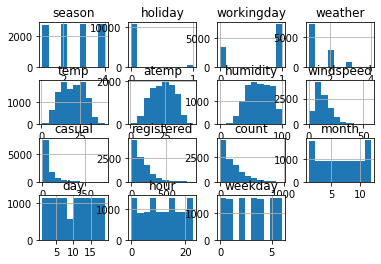

In [ ]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist()

In [ ]:
# create a new feature
# train['year']=train['datetime'].dt.year
train['month']=train['datetime'].dt.month
train['day']=train['datetime'].dt.day
train['hour']=train['datetime'].dt.hour
# train['weekday'] = train['datetime'].dt.weekday

# test['year']=test['datetime'].dt.year
test['month']=test['datetime'].dt.month
test['day']=test['datetime'].dt.day
test['hour']=train['datetime'].dt.hour
# test['weekday'] = train['datetime'].dt.weekday

# train = train.drop('weekday', axis = 1)
# test = test.drop('weekday', axis = 1)



## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [ ]:
train["season"] = train['season'].astype('category')
train["weather"] = train['weather'].astype('category')
test["season"] = test['season'].astype('category')
test["weather"] = test['weather'].astype('category')
# train.loc[:, "weather"] = train["weather"].astype("category")
# train.loc[:, "season"] = train["season"].astype("category")
# test.loc[:, "weather"] = test["weather"].astype("category")
# test.loc[:, "season"] = test["season"].astype("category")

In [ ]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,1,4


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff680166ad0>,
      dtype=object)

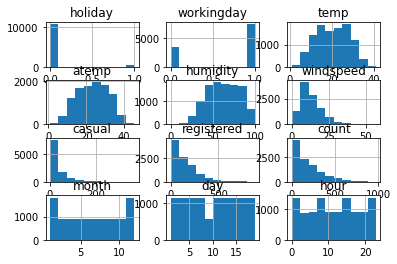

In [ ]:
# View histogram of all features again now with the hour feature
train.hist()

## Step 5: Rerun the model with the same settings as before, just with more features

In [ ]:
predictor_new_features = TabularPredictor(label="count", eval_metric="root_mean_squared_error", \
                             learner_kwargs={"ignored_columns": ["casual", "registered"]}) \
            .fit(train_data=train, time_limit=600, presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20220109_123003/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220109_123003/"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 14
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12697.36 MB
	Train Data (Original)  Memory Usage: 0.89 MB (0.0% of avail

[1000]	train_set's rmse: 30.5878	valid_set's rmse: 37.5945
[2000]	train_set's rmse: 25.793	valid_set's rmse: 36.0817
[3000]	train_set's rmse: 23.0687	valid_set's rmse: 35.6592
[4000]	train_set's rmse: 21.0911	valid_set's rmse: 35.6075
[5000]	train_set's rmse: 19.5585	valid_set's rmse: 35.5693


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.8203	valid_set's rmse: 41.4695
[2000]	train_set's rmse: 25.879	valid_set's rmse: 39.2637
[3000]	train_set's rmse: 23.1935	valid_set's rmse: 38.4962
[4000]	train_set's rmse: 21.2613	valid_set's rmse: 38.1806
[5000]	train_set's rmse: 19.746	valid_set's rmse: 37.8942
[6000]	train_set's rmse: 18.4848	valid_set's rmse: 37.6916
[7000]	train_set's rmse: 17.4389	valid_set's rmse: 37.5691
[8000]	train_set's rmse: 16.521	valid_set's rmse: 37.545
[9000]	train_set's rmse: 15.6977	valid_set's rmse: 37.525
[10000]	train_set's rmse: 14.9389	valid_set's rmse: 37.4721


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 31.3224	valid_set's rmse: 35.7764
[2000]	train_set's rmse: 26.1498	valid_set's rmse: 34.4519
[3000]	train_set's rmse: 23.3589	valid_set's rmse: 34.3154


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.9221	valid_set's rmse: 41.3108
[2000]	train_set's rmse: 25.6944	valid_set's rmse: 39.3914
[3000]	train_set's rmse: 23.0534	valid_set's rmse: 38.7312
[4000]	train_set's rmse: 21.1476	valid_set's rmse: 38.3661
[5000]	train_set's rmse: 19.649	valid_set's rmse: 38.199
[6000]	train_set's rmse: 18.4044	valid_set's rmse: 38
[7000]	train_set's rmse: 17.3808	valid_set's rmse: 37.8712
[8000]	train_set's rmse: 16.4885	valid_set's rmse: 37.8522
[9000]	train_set's rmse: 15.6941	valid_set's rmse: 37.7423
[10000]	train_set's rmse: 14.9852	valid_set's rmse: 37.7145


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.8176	valid_set's rmse: 38.7373
[2000]	train_set's rmse: 25.7379	valid_set's rmse: 37.1131
[3000]	train_set's rmse: 23.0594	valid_set's rmse: 36.8133
[4000]	train_set's rmse: 21.2012	valid_set's rmse: 36.7912
[5000]	train_set's rmse: 19.7067	valid_set's rmse: 36.7527


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.5275	valid_set's rmse: 41.6176
[2000]	train_set's rmse: 25.6587	valid_set's rmse: 40.7136
[3000]	train_set's rmse: 22.9809	valid_set's rmse: 40.4715
[4000]	train_set's rmse: 21.0804	valid_set's rmse: 40.4018


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 31.2445	valid_set's rmse: 38.1974
[2000]	train_set's rmse: 26.1596	valid_set's rmse: 35.3081
[3000]	train_set's rmse: 23.4646	valid_set's rmse: 34.5886
[4000]	train_set's rmse: 21.5012	valid_set's rmse: 34.2072
[5000]	train_set's rmse: 19.9575	valid_set's rmse: 34.0771
[6000]	train_set's rmse: 18.6741	valid_set's rmse: 34.0497
[7000]	train_set's rmse: 17.5938	valid_set's rmse: 34.0622


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.9465	valid_set's rmse: 39.2936
[2000]	train_set's rmse: 25.9673	valid_set's rmse: 37.9164
[3000]	train_set's rmse: 23.2424	valid_set's rmse: 37.554
[4000]	train_set's rmse: 21.2951	valid_set's rmse: 37.3552
[5000]	train_set's rmse: 19.7329	valid_set's rmse: 37.2682
[6000]	train_set's rmse: 18.4805	valid_set's rmse: 37.2057
[7000]	train_set's rmse: 17.4446	valid_set's rmse: 37.246


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.5914	valid_set's rmse: 41.1349
[2000]	train_set's rmse: 25.7442	valid_set's rmse: 40.1602
[3000]	train_set's rmse: 23.0758	valid_set's rmse: 39.928
[4000]	train_set's rmse: 21.1858	valid_set's rmse: 39.8469
[5000]	train_set's rmse: 19.6919	valid_set's rmse: 39.8308


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 31.2019	valid_set's rmse: 37.3663
[2000]	train_set's rmse: 26.1664	valid_set's rmse: 35.4792
[3000]	train_set's rmse: 23.4247	valid_set's rmse: 34.9177
[4000]	train_set's rmse: 21.516	valid_set's rmse: 34.6833
[5000]	train_set's rmse: 20.0336	valid_set's rmse: 34.5276
[6000]	train_set's rmse: 18.783	valid_set's rmse: 34.4199
[7000]	train_set's rmse: 17.7029	valid_set's rmse: 34.336
[8000]	train_set's rmse: 16.7846	valid_set's rmse: 34.364
[9000]	train_set's rmse: 15.9423	valid_set's rmse: 34.3475
[10000]	train_set's rmse: 15.2156	valid_set's rmse: 34.3716


	-36.7983	 = Validation score   (root_mean_squared_error)
	92.87s	 = Training   runtime
	7.57s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 286.16s of the 486.15s of remaining time.
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.1363	valid_set's rmse: 35.5572
[2000]	train_set's rmse: 15.5114	valid_set's rmse: 35.4473


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.0431	valid_set's rmse: 36.9373
[2000]	train_set's rmse: 15.5393	valid_set's rmse: 36.1173
[3000]	train_set's rmse: 12.204	valid_set's rmse: 35.918
[4000]	train_set's rmse: 9.99922	valid_set's rmse: 35.8485


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.4766	valid_set's rmse: 32.789


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.4591	valid_set's rmse: 38.1004
[2000]	train_set's rmse: 15.6967	valid_set's rmse: 37.1149
[3000]	train_set's rmse: 12.2044	valid_set's rmse: 36.7233
[4000]	train_set's rmse: 9.95476	valid_set's rmse: 36.6799


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.3995	valid_set's rmse: 37.384


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.6619	valid_set's rmse: 35.9544


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 20.9449	valid_set's rmse: 35.7483
[2000]	train_set's rmse: 15.4023	valid_set's rmse: 35.1407


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.3287	valid_set's rmse: 36.3231
[2000]	train_set's rmse: 15.6319	valid_set's rmse: 35.6071


	-36.5792	 = Validation score   (root_mean_squared_error)
	29.8s	 = Training   runtime
	1.44s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 251.19s of the 451.17s of remaining time.
	-41.3164	 = Validation score   (root_mean_squared_error)
	11.49s	 = Training   runtime
	0.48s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 237.67s of the 437.66s of remaining time.
	Time limit exceeded... Skipping CatBoost_BAG_L1.
Fitting model: ExtraTreesMSE_BAG_L1 ... Training model for up to 183.44s of the 383.43s of remaining time.
	-40.9062	 = Validation score   (root_mean_squared_error)
	4.65s	 = Training   runtime
	0.49s	 = Validation runtime
Fitting model: NeuralNetFastAI_BAG_L1 ... Training model for up to 177.18s of the 377.16s of remaining time.
	Ran out of time, stopping training early. (Stopping on epoch 29)
	Time limit exceeded... Skipping NeuralNetFastAI_BAG_L1.
Fitting model: XGBoost_BAG_L1 ... Training model fo

In [ ]:
# Remember to set all negative values to zero
predictions=predictor_new_features.predict(test)
predictions.head()

0    13.457298
1     4.553538
2     3.022402
3     3.503762
4     3.760586
Name: count, dtype: float32

In [ ]:
# How many negative values do we have?
count=0
for i in predictions:
    if i < 0:
        count=count+1
        
print(count)

2


In [ ]:
# Set them to zero
for i, row in enumerate(predictions):
    if row < 0:
            predictions[i] = 0

In [ ]:
# Same submitting predictions
submission_new_features = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])


submission_new_features["count"] = predictions
submission_new_features.to_csv("submission_new_features.csv", index=False)


In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

100% 188k/188k [00:01<00:00, 152kB/s]
Successfully submitted to Bike Sharing DemandWarning: Looks like you're using an outdated API Version, please consider updating (server 1.5.12 / client 1.5.4)
fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv  2021-11-16 16:08:41  new features                       complete  1.74186      1.74186       
submission_new_features.csv  2021-11-16 15:51:49  new features                       complete  1.74186      1.74186       
submission_new_hpo.csv       2021-11-16 15:27:09  new features with hyperparameters  complete  1.74380      1.74380       


#### New Score of `1.74`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [ ]:

num_trials = 5
search_strategy = 'auto'
hyperparameters = {
    'NN': {'num_epochs': 20, 'batch_size': 32}, 
    'GBM': {'num_boost_round': 50}
}
hyperparameter_tune_kwargs = { 
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}

predictor_new_hpo = TabularPredictor(
        label="count", 
        problem_type="regression", 
        eval_metric="root_mean_squared_error", 
        learner_kwargs={"ignored_columns": ["casual", "registered"]}
    ).fit(
        train_data=train, time_limit=600, presets="best_quality", hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs
)

No path specified. Models will be saved in: "AutogluonModels/ag-20220109_130202/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220109_130202/"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 14
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12694.4 MB
	Train Data (Original)  Memory Usage: 0.89 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 2 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeature

  0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a f

  0%|          | 0/5 [00:00<?, ?it/s]

	Ran out of time, stopping training early. (Stopping on epoch 1)
	Time limit exceeded
Fitted model: NeuralNetMXNet_BAG_L1/T0 ...
	-113.8317	 = Validation score   (root_mean_squared_error)
	9.11s	 = Training   runtime
	0.13s	 = Validation runtime
Fitting model: LightGBM_BAG_L1/T0 ... Training model for up to 384.65s of the 584.65s of remaining time.
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be remove

  0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a f

  0%|          | 0/5 [00:00<?, ?it/s]

	Ran out of time, stopping training early. (Stopping on epoch 0)
	Time limit exceeded
Fitted model: NeuralNetMXNet_BAG_L2/T0 ...
	-54.6645	 = Validation score   (root_mean_squared_error)
	4.94s	 = Training   runtime
	0.15s	 = Validation runtime
Fitting model: LightGBM_BAG_L2/T0 ... Training model for up to 206.73s of the 206.71s of remaining time.
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed

In [ ]:

predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                       model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        WeightedEnsemble_L3 -45.609293       6.095589  565.921915                0.000878           0.333063            3       True         14
1         LightGBM_BAG_L2/T4 -47.053868       3.295116  377.982015                0.117488           3.073586            2       True         12
2         LightGBM_BAG_L2/T3 -47.244420       3.291203  377.940292                0.113575           3.031863            2       True         11
3         LightGBM_BAG_L2/T0 -47.637622       3.298383  377.893236                0.120755           2.984807            2       True          8
4   NeuralNetMXNet_BAG_L2/T0 -48.301893       5.842224  559.566486                2.664596         184.658057            2       True         13
5         LightGBM_BAG_L2/T1 -50.359230       3.291871  377.922930  

{'leaderboard':                        model  score_val  ...  can_infer  fit_order
 0        WeightedEnsemble_L3 -45.609293  ...       True         14
 1         LightGBM_BAG_L2/T4 -47.053868  ...       True         12
 2         LightGBM_BAG_L2/T3 -47.244420  ...       True         11
 3         LightGBM_BAG_L2/T0 -47.637622  ...       True          8
 4   NeuralNetMXNet_BAG_L2/T0 -48.301893  ...       True         13
 5         LightGBM_BAG_L2/T1 -50.359230  ...       True          9
 6        WeightedEnsemble_L2 -53.204983  ...       True          7
 7         LightGBM_BAG_L1/T3 -53.478120  ...       True          4
 8         LightGBM_BAG_L2/T2 -53.489226  ...       True         10
 9         LightGBM_BAG_L1/T1 -54.676179  ...       True          2
 10        LightGBM_BAG_L1/T0 -54.692703  ...       True          1
 11        LightGBM_BAG_L1/T2 -55.506280  ...       True          3
 12        LightGBM_BAG_L1/T4 -62.521667  ...       True          5
 13  NeuralNetMXNet_BAG_L1/T0 -76

In [ ]:
# Remember to set all negative values to zero 
predictions=predictor_new_hpo.predict(test)
predictions.head()


0    24.396503
1    14.996004
2    13.902639
3    13.899763
4    13.984074
Name: count, dtype: float32

In [ ]:

for i, row in enumerate(predictions):
    if row < 0:
            predictions[i] = 0
        
predictions.describe()

count    6493.000000
mean      184.654724
std       159.398758
min        13.280485
25%        58.646320
50%       145.382690
75%       253.451294
max       857.280640
Name: count, dtype: float64

In [ ]:
# Same submitting predictions
submission_new_hpo = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_hpo["count"] = predictions
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:01<00:00, 115kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:

!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2022-01-09 13:14:10  new features with hyperparameters  complete  1.68015      1.68015       
submission_new_features.csv  2022-01-09 12:42:42  new features                       complete  1.76703      1.76703       
submission_new_features.csv  2022-01-09 12:20:52  new features                       error     None         None          


#### New Score of `1.68`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

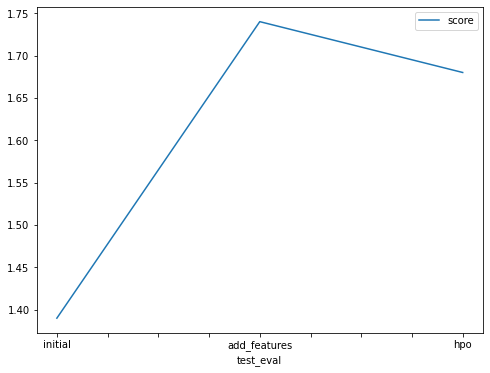

In [3]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.39, 1.74,1.68 ]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [6]:
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "num_trials": ["default", "default", 5],
    "scheduler": ["default", "default", "local"],
    "searcher": ["default", "default", "auto"],
    "time_limit": [600, 600, 600],
    "hyperparameters": ["default", "default", "NN[20], GBM[50]"],
    "score": [1.39, 1.74, 1.68]
})

,model,num_trials,scheduler,searcher,time_limit,hyperparameters,score
0,initial,default,default,default,600,default,1.39
1,add_features,default,default,default,600,default,1.74
2,hpo,5,local,auto,600,"NN[20], GBM[50]",1.68
